## Data Visualization - Game of Thrones - Creating Interactive Network Graphs

**Quick Notes**

This Notebook takes the relationship extracts and creates interactive graphs!

Graphs are saved as '.html' files for visualization in *your* browser and saved as '.gml' files for further use.

**Sources**

[NetworkX](https://networkx.org/)

[Pyvis](https://pyvis.readthedocs.io/en/latest/documentation.html)

[Community API (louvain)](https://python-louvain.readthedocs.io/en/latest/api.html)

### Import the necessary tools

In [60]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

## 1 - Load Dataframes

In [61]:
# All season directories
all_csvs = [s for s in os.scandir('Relationship_extracts') if 'rel_df' in s.name]
# Sort directories
all_csvs.sort(key=lambda x: x.name)

In [62]:
# Store dataframes
dataframes = []
# Read in csvs
for csv in all_csvs:
    cur_csv = pd.read_csv(csv, header=0, index_col=0)
    dataframes.append(cur_csv)

### 1.1 - Filter Weak Relationships

> Disabled for now

In [63]:
# Introducing a filter helps visualizing main character arks more easily. Adjust as you like :)
fil_dfs = []
counter = 0
# Filter has to be adjusted season wise as writing style and size of season varys..
filters = [10, 3, 2, 2, 3, 1, 2, 1]
# apply filters
for df in dataframes:
    fil = filters[counter]
    cur_df = df.loc[df['value'] > fil]
    fil_dfs.append(cur_df)
    counter += 1

## 2 - Create Graphs

### 2.1 - Graph draft with nx.network

In [64]:
# var to store graphs
season_graphs = []

In [65]:
# Create graphs
for df in dataframes:
    G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='value', create_using=nx.Graph())
    season_graphs.append(G)

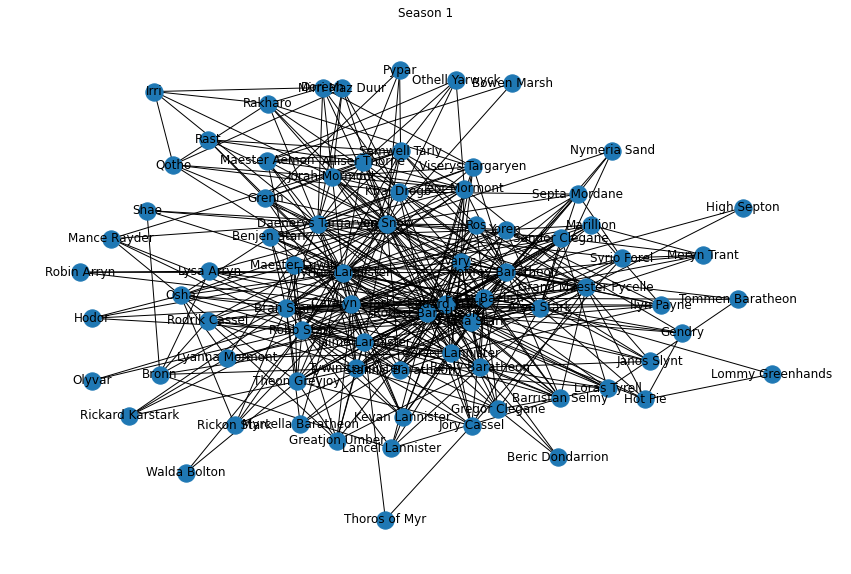

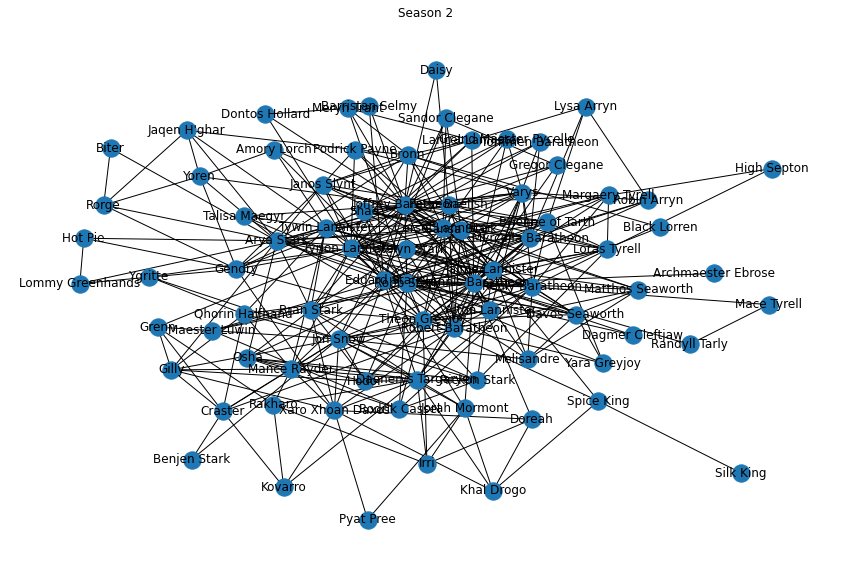

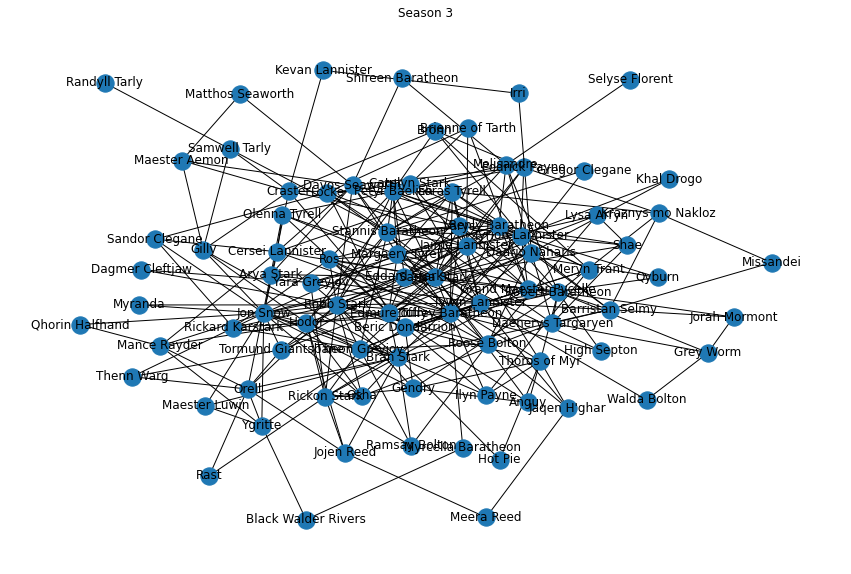

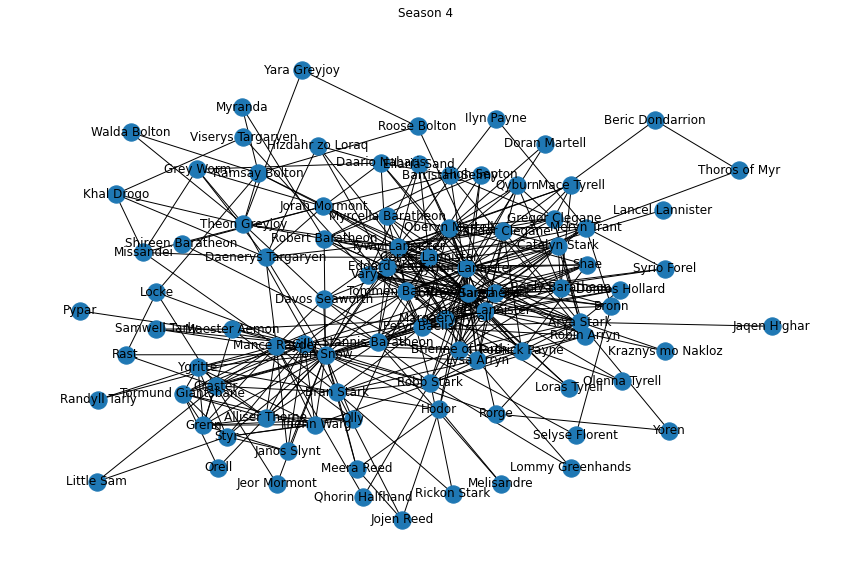

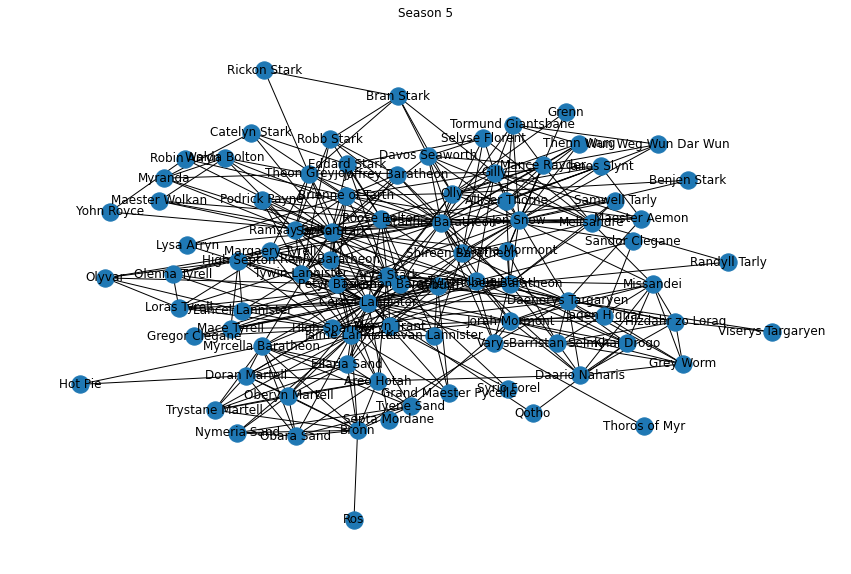

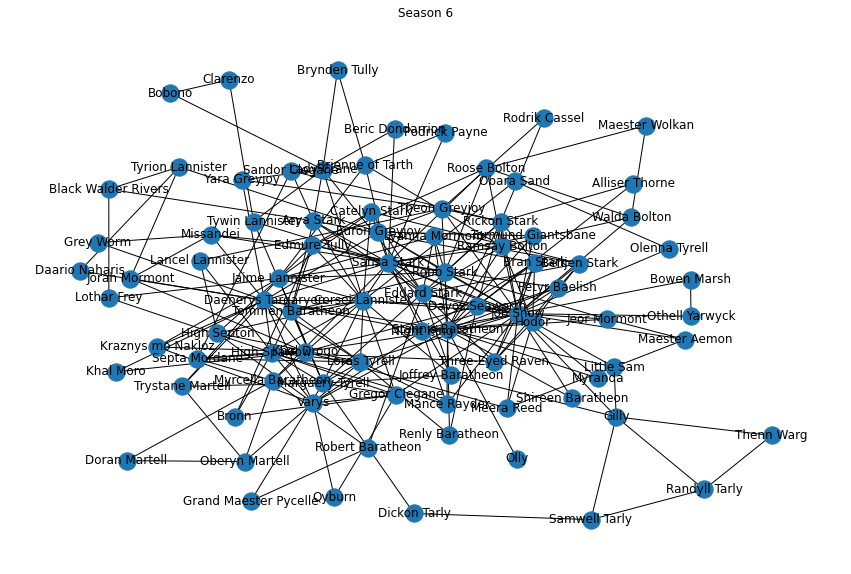

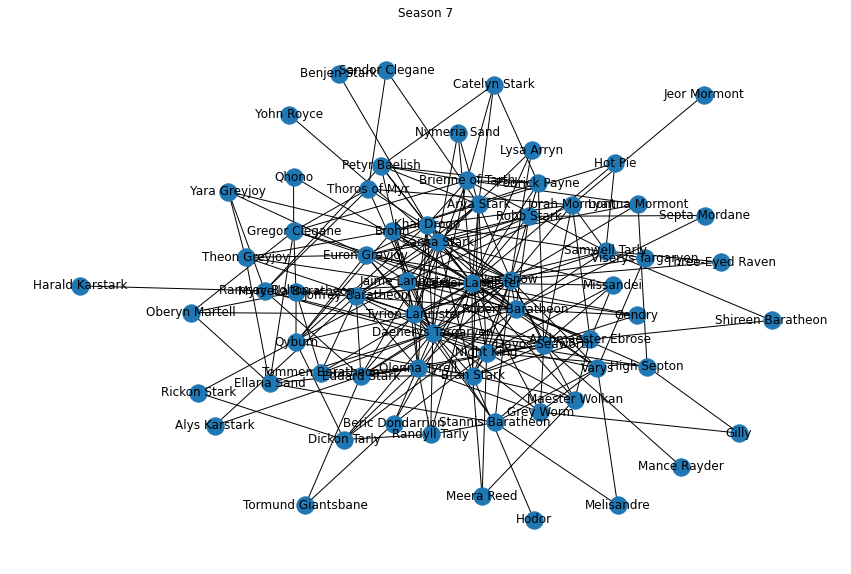

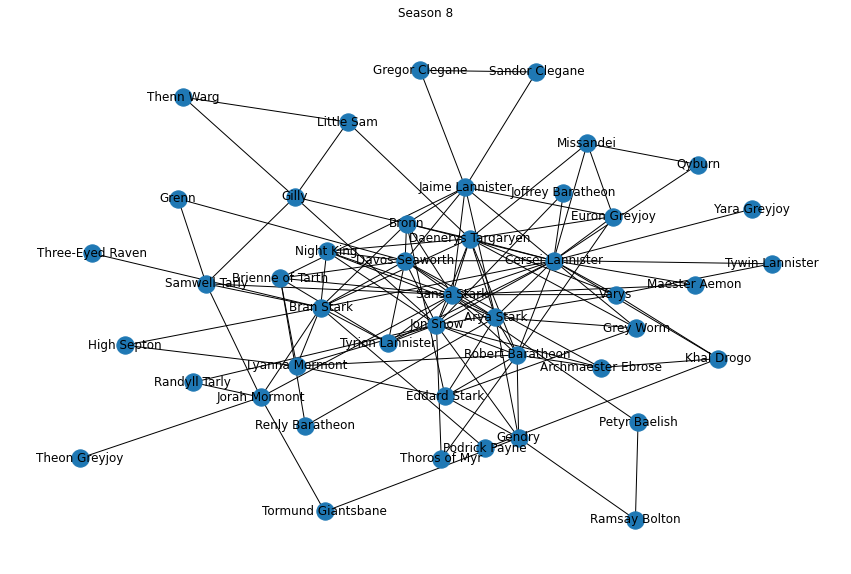

In [66]:
counter = 1
# Plot graphs as drafts... pretty visualization further below
for g in season_graphs:
    plt.figure(counter,figsize=(15,10))
    plt.title('Season '+str(counter))
    pos = nx.kamada_kawai_layout(g)
    nx.draw(g, with_labels=True, edge_cmap=plt.cm.Blues, pos = pos)
    counter += 1

## 3 - Graph Visualization

### Import the necessary tools

In [67]:
from pyvis.network import Network
import community as community_louvain

### 3.1 - Create communities

In [68]:
# Model communities
for g in season_graphs:
    communities = community_louvain.best_partition(g)
    nx.set_node_attributes(g, communities, 'group')

### 3.2 - Create interactive graphs as html

In [69]:
# Model node size
for g in season_graphs:
    node_degree = dict(g.degree)
    nx.set_node_attributes(g, node_degree, 'size')

In [70]:
# Visualize graph, create html
counter = 1
for g in season_graphs:
    # initialize graph
    com_net = Network(width = '1500px', height='820px', bgcolor='#222222', font_color='white')
    # set edge type 
    com_net.set_edge_smooth('dynamic')
    # set graph layout
    com_net.force_atlas_2based(gravity=-40, central_gravity=0.01, spring_length=150, spring_strength=0.05, damping=0.5, overlap=0)
    # load graphs from networkx
    com_net.from_nx(g)
    cur = 'Season_'+str(counter)+'.html'
    com_net.show(cur) # Show graphs, also saves file as html
    counter += 1

### 3.3 - Save graphs as gml

In [71]:
counter = 1

for g in season_graphs:
    path = 'Season_'+str(counter)+'.gml'
    nx.write_gml(g, path)
    counter += 1